# Louvaine Algorithm

In [2]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt

## Generate Network

In [3]:
def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

In [16]:
%%time
n = 500
G = generate_network(n)

CPU times: user 48.6 ms, sys: 33.8 ms, total: 82.4 ms
Wall time: 99.8 ms


In [17]:
print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 50
Number of edges: 297
Average degree:  11.8800


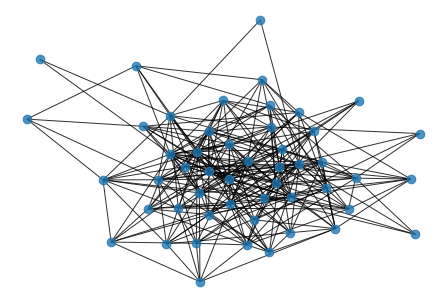

In [45]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

## Apply Louvain Algorithm

In [18]:
%time comms = community_louvain.best_partition(G)

CPU times: user 24.9 ms, sys: 1.89 ms, total: 26.8 ms
Wall time: 25.8 ms


In [46]:
comms

{0: 0,
 1: 1,
 2: 0,
 3: 0,
 4: 2,
 5: 4,
 6: 4,
 7: 1,
 8: 4,
 9: 0,
 10: 3,
 11: 4,
 12: 4,
 13: 3,
 14: 4,
 15: 0,
 16: 0,
 17: 0,
 18: 2,
 19: 0,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 2,
 25: 4,
 26: 0,
 27: 2,
 28: 3,
 29: 3,
 30: 4,
 31: 3,
 32: 3,
 33: 4,
 34: 3,
 35: 3,
 36: 3,
 37: 4,
 38: 1,
 39: 2,
 40: 2,
 41: 0,
 42: 2,
 43: 1,
 44: 1,
 45: 1,
 46: 2,
 47: 0,
 48: 3,
 49: 0}

## Visualize Communities

In [50]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green'
}

In [53]:
node_cmap = [cmap[v] for _,v in comms.items()]

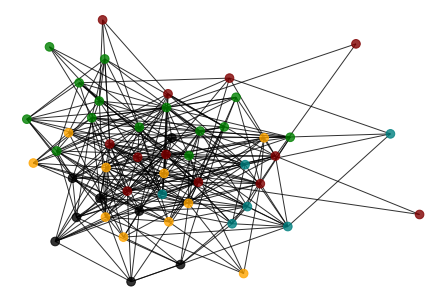

In [54]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_colors)
plt.show()

---